In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Generate synthetic data for placement prediction
np.random.seed(42) # for reproducibility

num_samples = 500

# Generate CGPA
cgpa = np.random.uniform(low=5.0, high=10.0, size=num_samples)

# Generate Test Score (assuming higher score is better)
score = np.random.randint(low=40, high=100, size=num_samples)

# Generate 'Placed' column
# Logic: Higher CGPA and Score are more likely to be placed
# We can use a combination of CGPA and Score to determine placement probability
# Let's create a simple model where probability increases with CGPA and Score
placement_probability = 0.1 + (cgpa - 5.0) / 5.0 * 0.4 + (score - 40) / 60 * 0.4
placement_probability = np.clip(placement_probability, 0, 1) # Ensure probability is between 0 and 1

placed = (np.random.rand(num_samples) < placement_probability).astype(int)

# Create a DataFrame
data = pd.DataFrame({'cgpa': cgpa, 'score': score, 'placed': placed})

# Introduce some noise/outliers to make it more realistic
# For example, some students with high CGPA/Score might not be placed and vice versa
num_outliers = int(num_samples * 0.05) # 5% outliers

# Introduce some students with high CGPA/Score who are NOT placed
high_perf_not_placed_indices = data[(data['cgpa'] > 8.5) & (data['score'] > 80) & (data['placed'] == 1)].sample(n=min(num_outliers // 2, len(data[(data['cgpa'] > 8.5) & (data['score'] > 80) & (data['placed'] == 1)])), replace=False).index
data.loc[high_perf_not_placed_indices, 'placed'] = 0

# Introduce some students with low CGPA/Score who ARE placed (e.g., through connections, specific skills)
low_perf_placed_indices = data[(data['cgpa'] < 6.0) & (data['score'] < 50) & (data['placed'] == 0)].sample(n=min(num_outliers - len(high_perf_not_placed_indices), len(data[(data['cgpa'] < 6.0) & (data['score'] < 50) & (data['placed'] == 0)])), replace=False).index
data.loc[low_perf_placed_indices, 'placed'] = 1

data.head()



,cgpa,score,placed
0,6.872701,93,0
1,9.753572,56,1
2,8.659970,48,0
3,7.993292,72,1
4,5.780093,92,1


In [55]:
x = data.drop('placed', axis=1) # Use the DataFrame df instead
y = data['placed']

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=54)

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [59]:
lr.score(x_test, y_test)*100
# lr.predict([[6.624075,4.427356]])

54.0

In [60]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [61]:
cf = confusion_matrix(y_test, lr.predict(x_test))

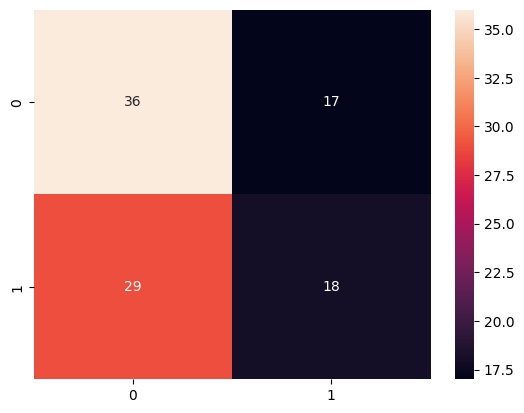

In [62]:
sns.heatmap(cf, annot=True)
plt.show()

In [63]:
precision_score(y_test, lr.predict(x_test))

0.5142857142857142

In [64]:
recall_score(y_test, lr.predict(x_test))

0.3829787234042553

In [65]:
f1_score(y_test, lr.predict(x_test))

0.43902439024390244